# Results

In [1]:
!pip install matplotlib numpy --quiet

You should consider upgrading via the '/mnt/data/vv_cw_2/venv/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import json
import os
results_path = os.path.join('results')
results_folders = []

for root, dirs, files in os.walk(results_path):
    if root == results_path:
        results_folders = dirs
        break

data = {}
for folder in results_folders:
    data[folder] = {}
    for root, dirs, files in os.walk(os.path.join(results_path,folder)):
        for file in files:
            if file == 'final_report.json':
                with open(os.path.join(root,file)) as f:
                    data[folder][os.path.basename(root)] = json.load(f)
                    


models = [ results['model'] for report, questions in data.items() for question, results in questions.items() ]
models = list(set(models))
questions = [ question for report, questions in data.items() for question, results in questions.items() ]
questions = sorted(list(set(questions)), key=lambda x: x.lower())




##  Overview
### Did the solution pass the tests?

Text(0.5, 1.0, 'Number of tests passed by model')

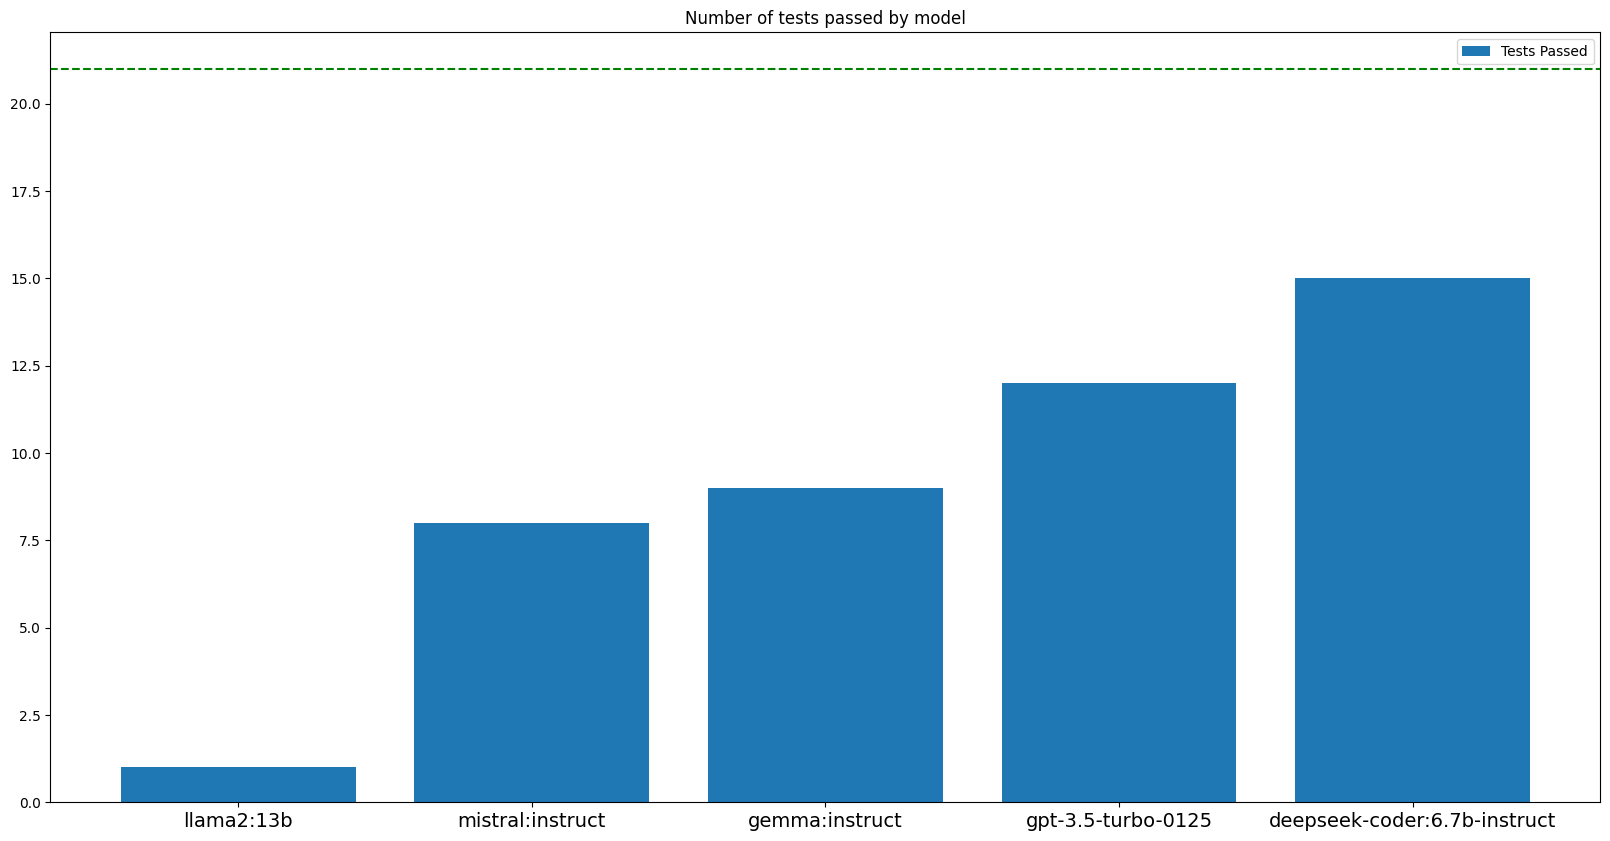

In [3]:
from matplotlib import pyplot as plt

tests_passed_x = models
tests_passed_y = []

for model in models:
    passed = 0
    for report, questions in data.items():
        for question, results in questions.items():
            if results['model'] == model:
                passed += results['passed']
    tests_passed_y.append(passed)
#sort 
tests_passed_x, tests_passed_y = zip(*sorted(zip(tests_passed_x, tests_passed_y), key=lambda x: x[1]))
plt.bar(tests_passed_x, tests_passed_y)
plt.legend(['Tests Passed'])
total_tests = 21
plt.axhline(y=total_tests, color='g', linestyle='--')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(fontsize=14)
plt.title('Number of tests passed by model')

### How many retries were there?




## Response


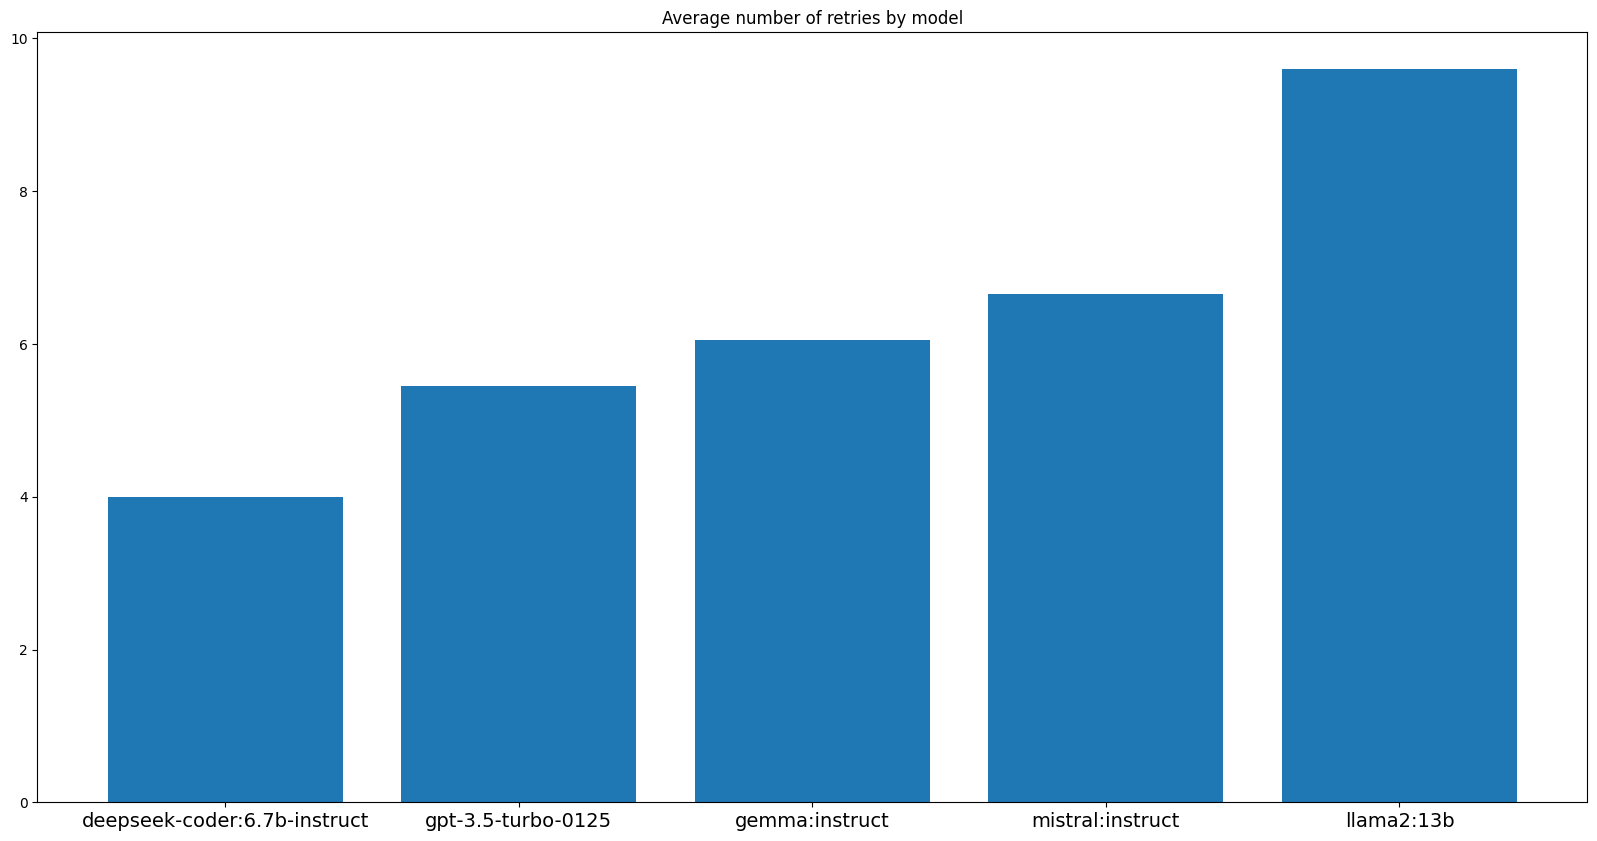

In [4]:
import matplotlib.pyplot as plt
sorted_questions = sorted(questions)
average_retries_y = {}
for model in models:
    total_retries_x = [question_name.split('_')[1] for question_name in sorted_questions]
    total_retries_y = []

    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    total_retries_y.append(results['total_retries'])
                    break

    # average retries per model
    average_retries = sum(total_retries_y) / len(total_retries_y)
    average_retries_y[model] = average_retries
    
    
# order by average retries
average_retries_y = dict(sorted(average_retries_y.items(), key=lambda item: item[1]))
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.bar(average_retries_y.keys(), average_retries_y.values())
plt.xticks(fontsize=14)
plt.title('Average number of retries by model')
plt.show()

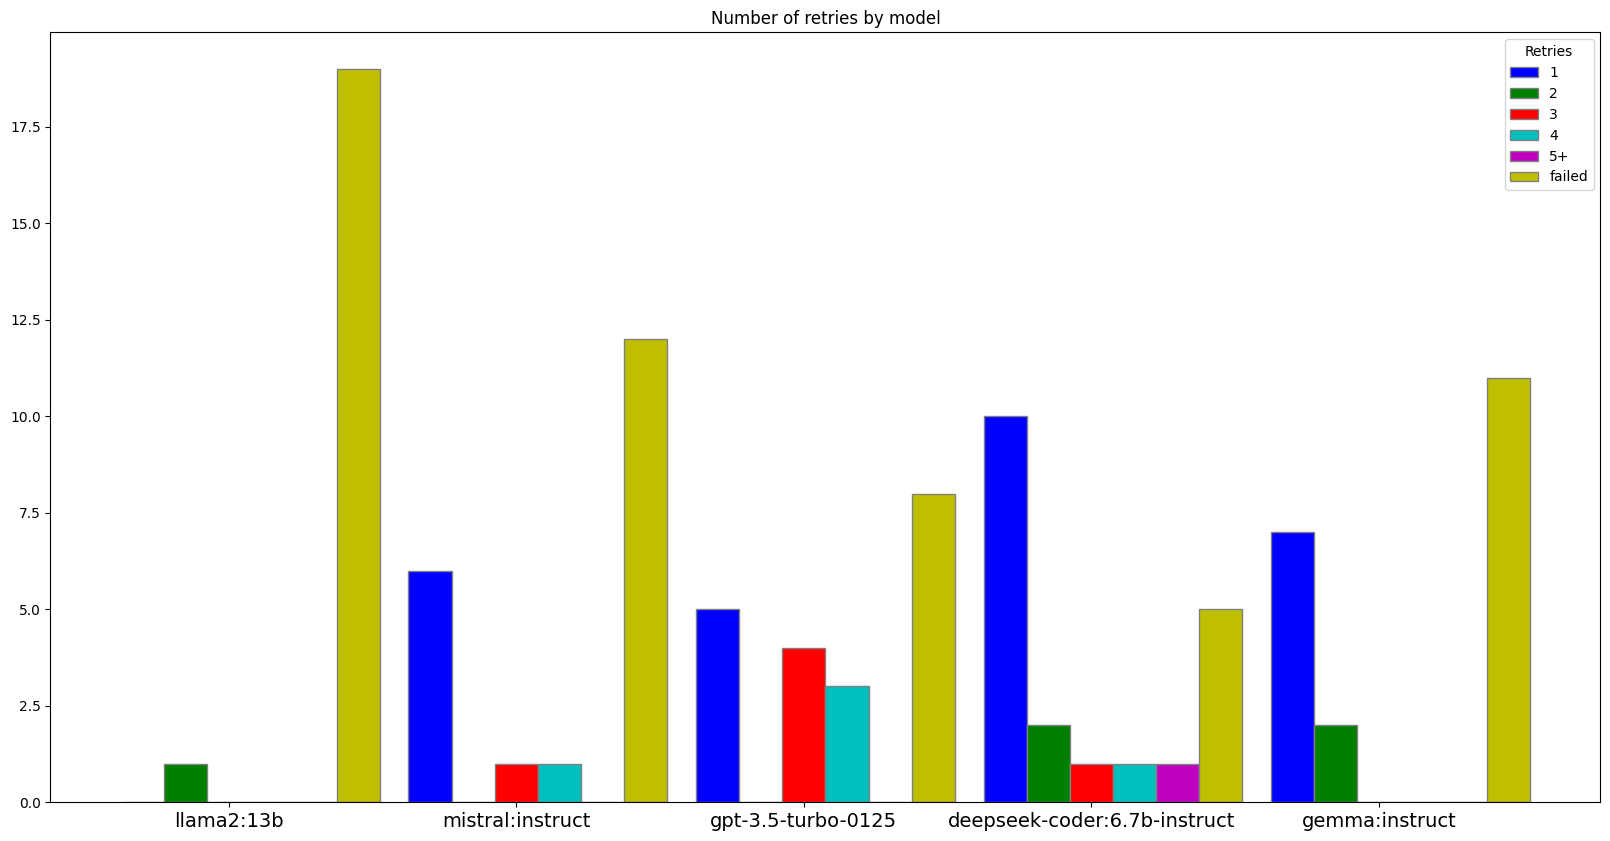

In [5]:
import matplotlib.pyplot as plt
sorted_questions = sorted(questions)
average_retries_y = {}
for model in models:
    total_retries_x = [question_name.split('_')[1] for question_name in sorted_questions]
    average_retries_y[model] =  {'1': 0, '2': 0, '3': 0, '4': 0, '5+': 0, 'failed': 0}

    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    retries = results['total_retries']
                    if results['passed'] != 1:
                        average_retries_y[model]['failed'] += 1
                    elif retries == 1:
                        average_retries_y[model]['1'] += 1
                    elif retries == 2:
                        average_retries_y[model]['2'] += 1
                    elif retries == 3:
                        average_retries_y[model]['3'] += 1
                    elif retries == 4:
                        average_retries_y[model]['4'] += 1
                    elif retries >= 5 and retries <= 10:
                        average_retries_y[model]['5+'] += 1
                    break

fig = plt.gcf()
fig.set_size_inches(20, 10)
r1 = [average_retries_y[model]['1'] for model in models]
r2 = [average_retries_y[model]['2'] for model in models]
r3 = [average_retries_y[model]['3'] for model in models]
r4 = [average_retries_y[model]['4'] for model in models]
r5 = [average_retries_y[model]['5+'] for model in models]
rfailed = [average_retries_y[model]['failed'] for model in models]
barWidth = 0.15
r = range(len(models))
plt.bar(r, r1, color='b', width=barWidth, edgecolor='grey', label='1')
plt.bar([i + barWidth for i in r], r2, color='g', width=barWidth, edgecolor='grey', label='2')
plt.bar([i + barWidth*2 for i in r], r3, color='r', width=barWidth, edgecolor='grey', label='3')
plt.bar([i + barWidth*3 for i in r], r4, color='c', width=barWidth, edgecolor='grey', label='4')
plt.bar([i + barWidth*4 for i in r], r5, color='m', width=barWidth, edgecolor='grey', label='5+')
plt.bar([i + barWidth*5 for i in r], rfailed, color='y', width=barWidth, edgecolor='grey', label='failed')
plt.xticks([r + barWidth*2 for r in range(len(models))], models, fontsize=14)
plt.title('Number of retries by model')
plt.legend(title='Retries')
# show legent on bar
plt.show()



### Was is extracted correctly?


['llama2:13b', 'mistral:instruct', 'gpt-3.5-turbo-0125', 'deepseek-coder:6.7b-instruct', 'gemma:instruct']


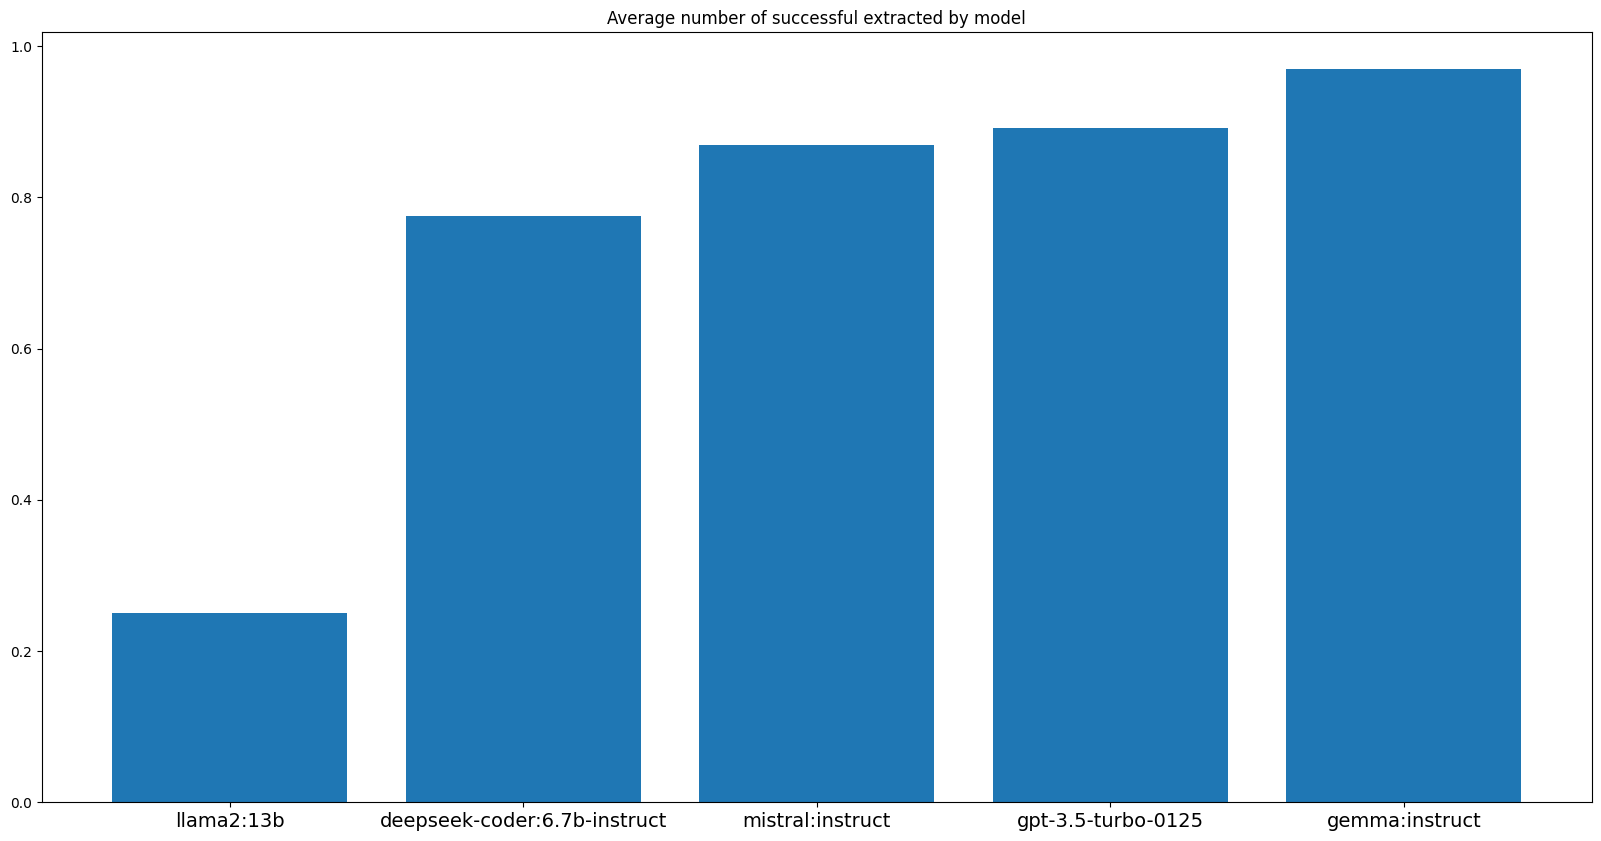

In [6]:
sorted_questions = sorted(questions)
total_extracted_x = [question_name.split('_')[1] for question_name in sorted_questions]
total_extracted_y = []
average_extracted_y = {}
print(models)
for model in models:
    total_extracted_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extracted_success_rate = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['is_extracted']:
                            extracted_success_rate += 1
                    total_extracted_y.append(extracted_success_rate/len(results['tries']))
                    break
                  

    average_extracted = sum(total_extracted_y) / len(total_extracted_y)
    average_extracted_y[model] = average_extracted
    

average_extracted_y = dict(sorted(average_extracted_y.items(), key=lambda item: item[1]))
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.bar(average_extracted_y.keys(), average_extracted_y.values())
plt.xticks(fontsize=14)
plt.title('Average number of successful extracted by model')
plt.show()    
    




### How many blocks of code were there?


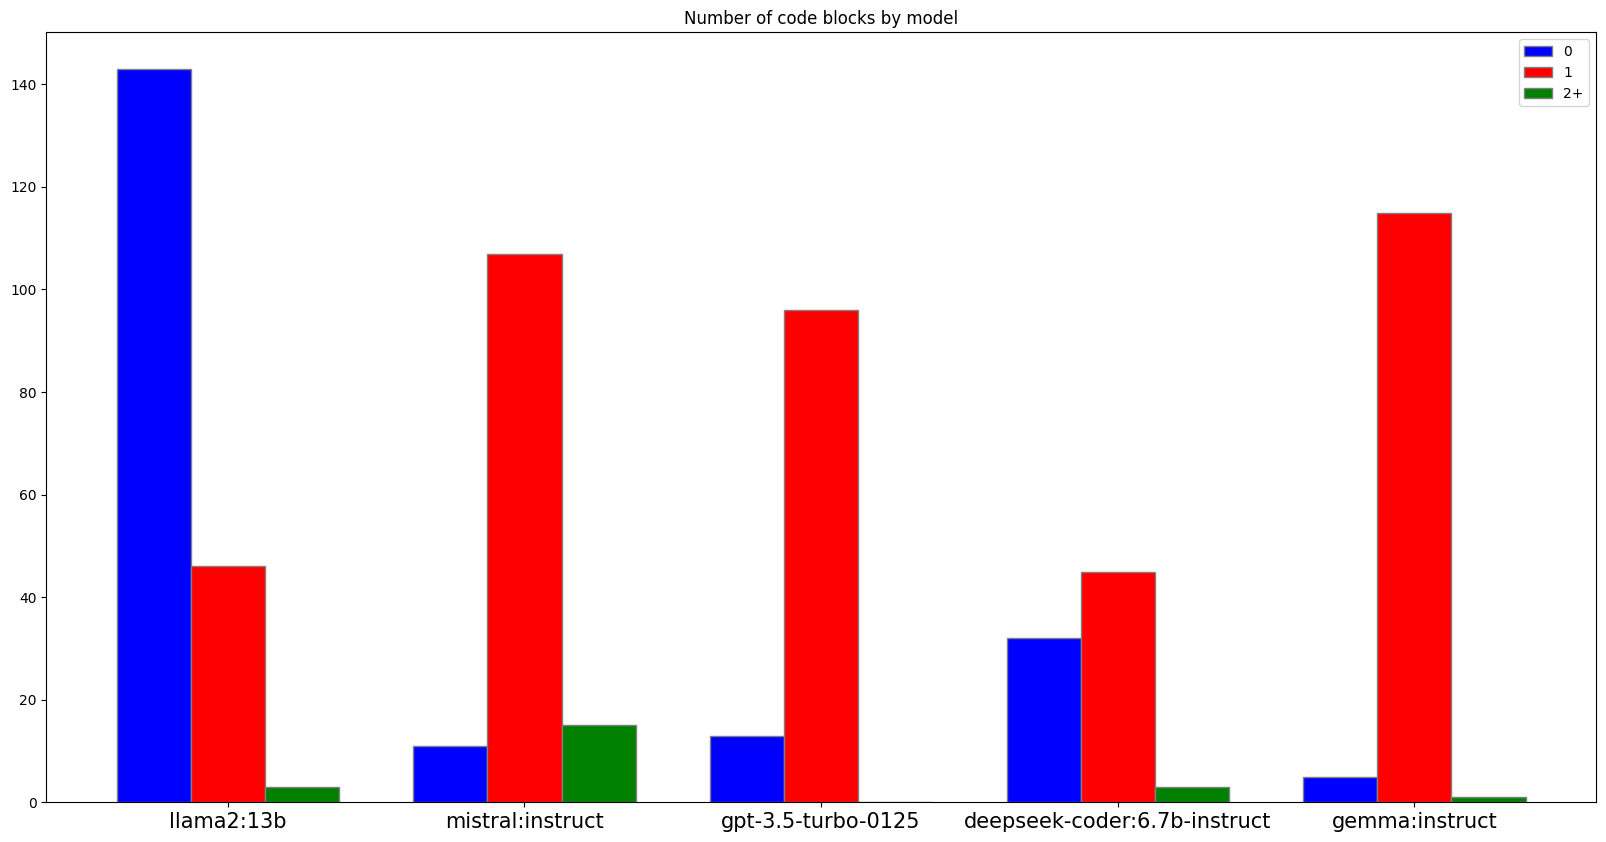

In [7]:
sorted_questions = sorted(questions)
total_code_blocks_x = [question_name.split('_')[1] for question_name in sorted_questions]
total_code_blocks_y = []
code_blocks_y = {}


for model in models:
    code_blocks_y[model] = {'0': 0, '1': 0, '2+': 0}
    total_code_blocks_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    for retry in results['tries']:
                        number_of_code_blocks = results['tries'][retry]['number_of_code_blocks']
                        if number_of_code_blocks == None or number_of_code_blocks == 0:
                            code_blocks_y[model]['0'] += 1 
                        elif number_of_code_blocks == 1:
                            code_blocks_y[model]['1'] += 1
                        elif number_of_code_blocks >= 2:
                            code_blocks_y[model]['2+'] += 1
                            
                            
    # make bar plot 3 bars per model
fig = plt.gcf()
fig.set_size_inches(20, 10)
barWidth = 0.25
r1 = range(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, [code_blocks_y[model]['0'] for model in models], color='b', width=barWidth, edgecolor='grey', label='0')
plt.bar(r2, [code_blocks_y[model]['1'] for model in models], color='r', width=barWidth, edgecolor='grey', label='1')
plt.bar(r3, [code_blocks_y[model]['2+'] for model in models], color='g', width=barWidth, edgecolor='grey', label='2+')
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45)
plt.legend(['0', '1', '2+'])
plt.title('Number of code blocks by model')
plt.xticks(fontsize=15, rotation=0)
plt.show()



### Was there additional information?


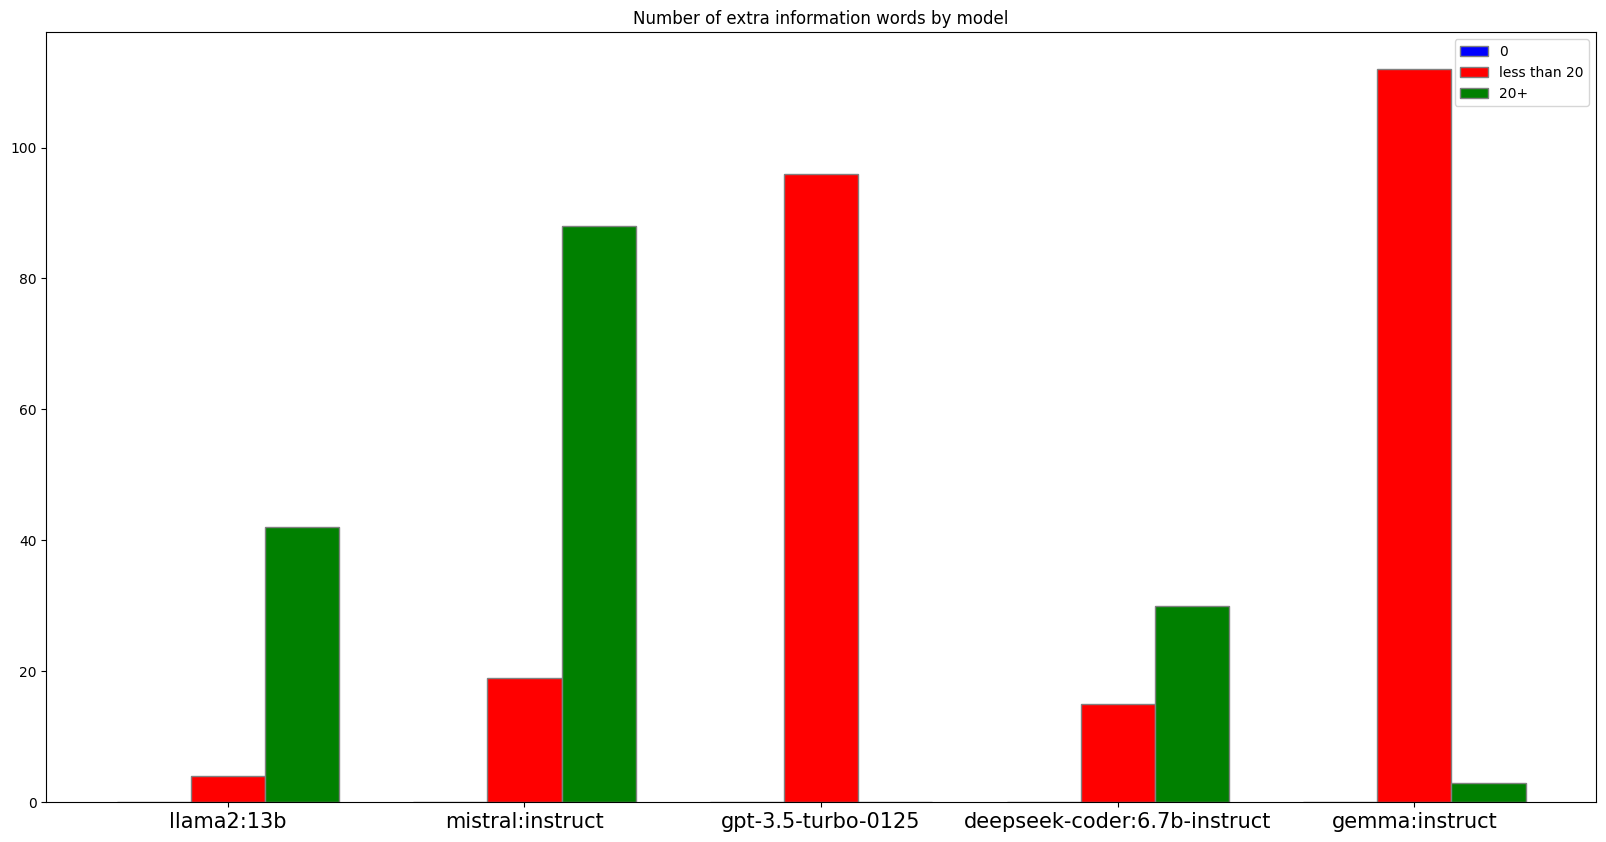

In [8]:
# "extra_information_num_words"
sorted_questions = sorted(questions)
extra_information_num_words_x = [question_name.split('_')[1] for question_name in sorted_questions]
extra_information_num_words_y = {}

for model in models:
    extra_information_num_words_y[model] = {'0': 0, 'less than 20': 0, '20+': 0}
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extra_information_num_words = 0
                    for retry in results['tries']:
                        num_words = results['tries'][retry]['extra_information_num_words']
                        if num_words == None:
                            continue
                        elif num_words == 0:
                            extra_information_num_words_y[model]['0'] += 1 
                        elif num_words < 20:
                            extra_information_num_words_y[model]['less than 20'] += 1
                        elif num_words >= 20:
                            extra_information_num_words_y[model]['20+'] += 1
                            
                      
                
fig = plt.gcf()
fig.set_size_inches(20, 10)
barWidth = 0.25
r1 = range(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, [extra_information_num_words_y[model]['0'] for model in models], color='b', width=barWidth, edgecolor='grey', label='0')
plt.bar(r2, [extra_information_num_words_y[model]['less than 20'] for model in models], color='r', width=barWidth, edgecolor='grey', label='less than 20')
plt.bar(r3, [extra_information_num_words_y[model]['20+'] for model in models], color='g', width=barWidth, edgecolor='grey', label='20+')
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45)
plt.legend(['0', 'less than 20', '20+'])
plt.title('Number of extra information words by model')
plt.xticks(fontsize=15, rotation=0)
plt.show()

## Infer



### How many successful compilations were there?


['llama2:13b', 'mistral:instruct', 'gpt-3.5-turbo-0125', 'deepseek-coder:6.7b-instruct', 'gemma:instruct']


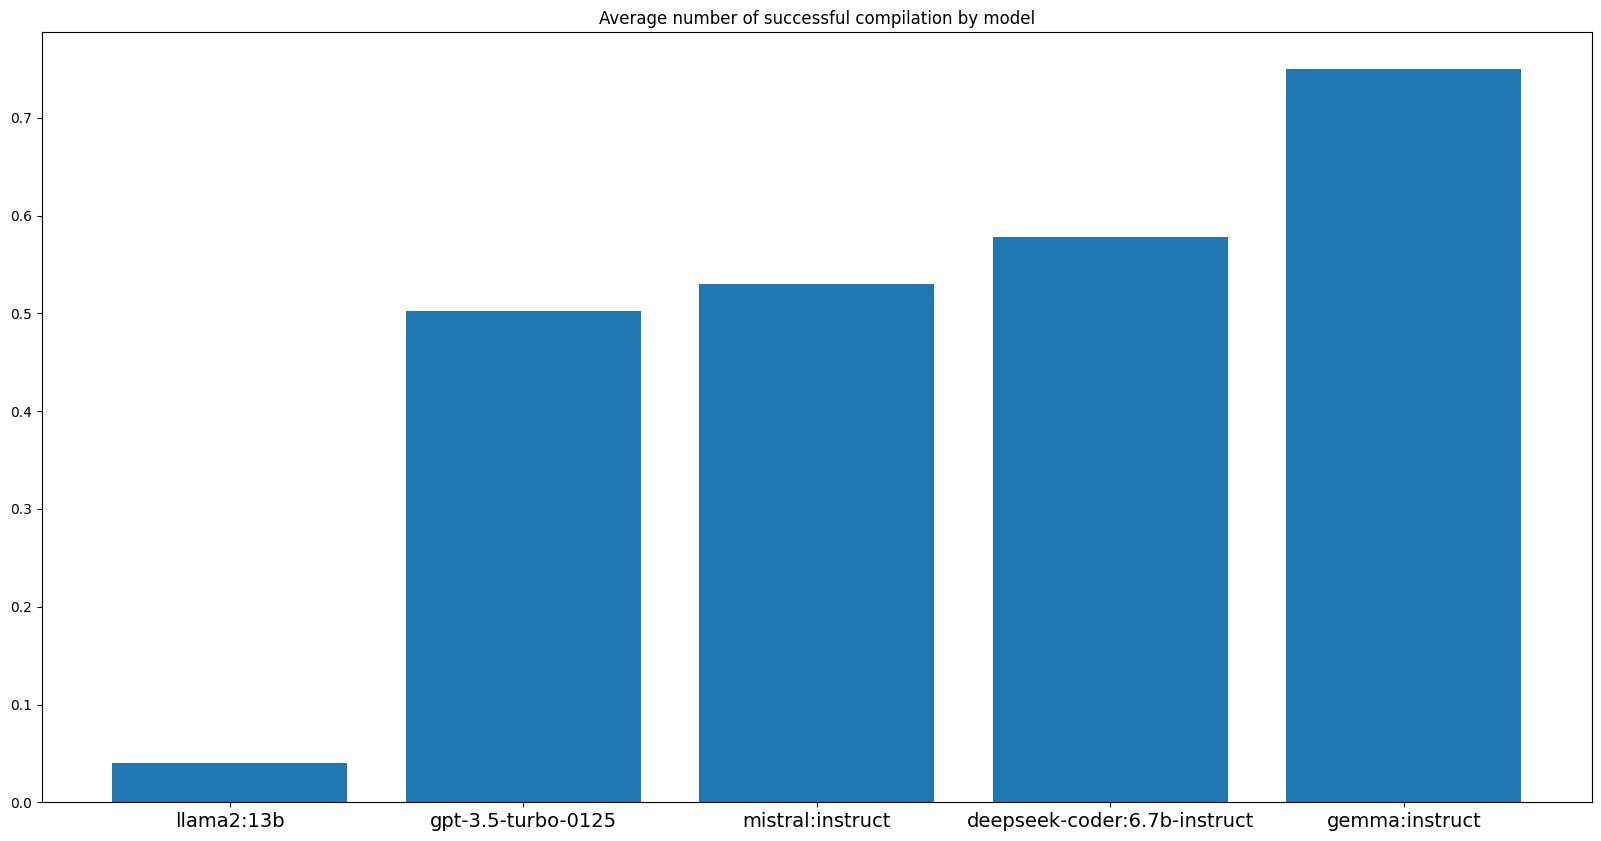

In [9]:
sorted_questions = sorted(questions)
total_compilation_x = [question_name.split('_')[1] for question_name in sorted_questions]
total_compilation_y = []
average_compilation_y = {}
print(models)
for model in models:
    total_compilation_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    compilation_success_rate = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['number_of_issues'] == 0:
                            compilation_success_rate += 1
                    total_compilation_y.append(compilation_success_rate/len(results['tries']))
                    break
                  
    average_compilation = sum(total_compilation_y) / len(total_compilation_y)
    average_compilation_y[model] = average_compilation
    

average_compilation_y = dict(sorted(average_compilation_y.items(), key=lambda item: item[1]))
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.bar(average_compilation_y.keys(), average_compilation_y.values())
plt.xticks(fontsize=14)
plt.title('Average number of successful compilation by model')
plt.show()    
    




### What were the issues?





## Tests




### How many tests were there?


In [10]:
# No need



### How many tests passed?


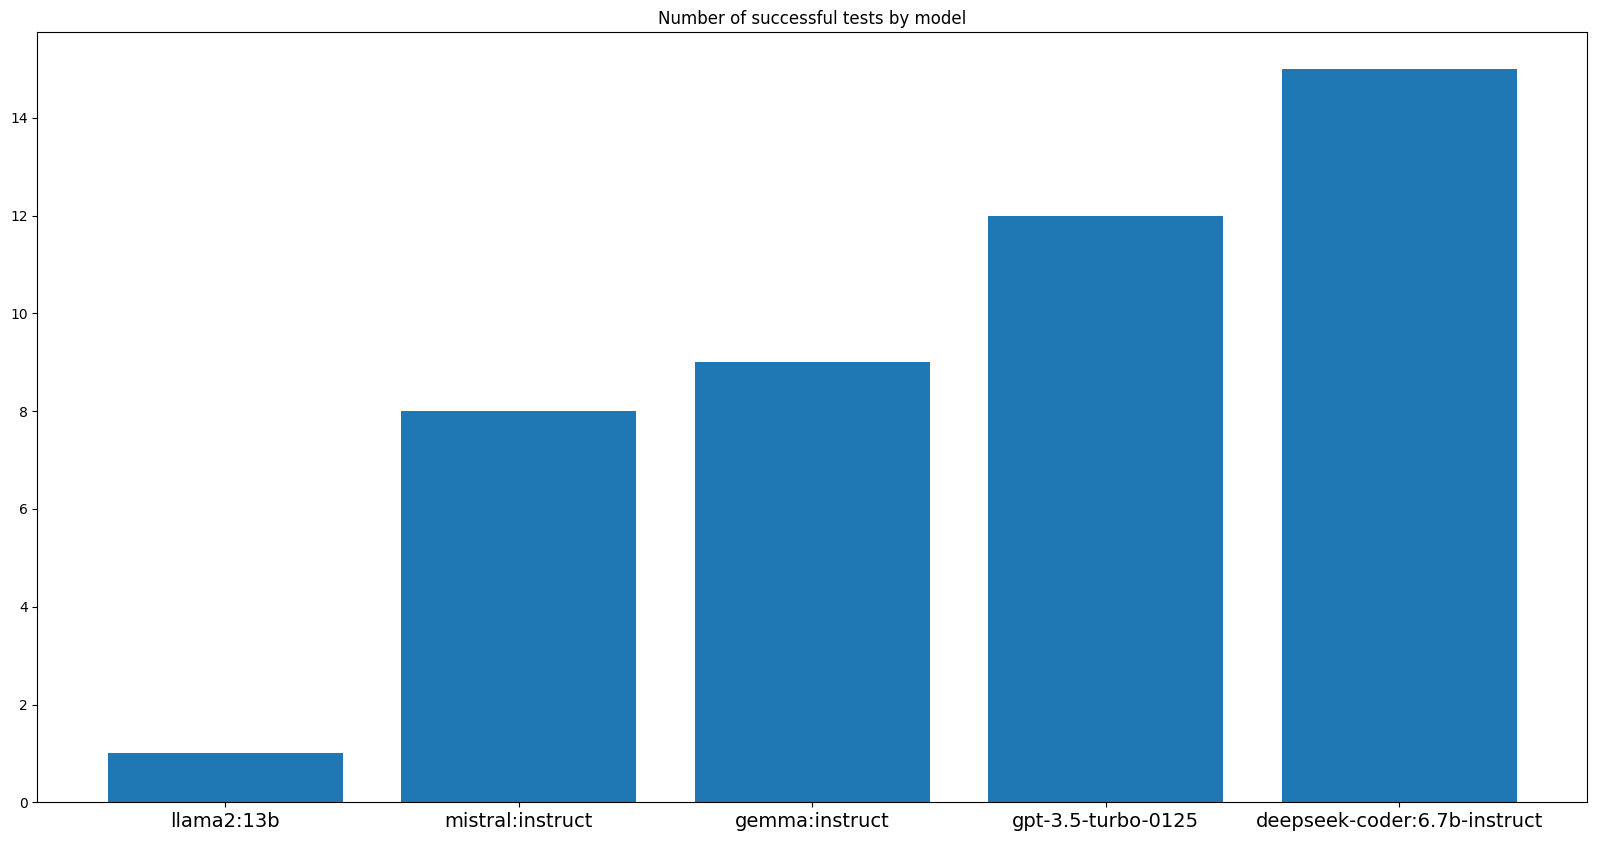

In [11]:
# "num_successes" is not None 
sorted_questions = sorted(questions)

num_successes_x = [question_name.split('_')[1] for question_name in sorted_questions]
num_successes_y = {}

for model in models:
    num_successes_y[model] = 0
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    for retry in results['tries']:
                        if results['tries'][retry]['num_tests'] is not None and int(results['tries'][retry]['num_successes']) == int(results['tries'][retry]['num_tests']):
                            num_successes_y[model] += 1
                            break
                          
fig = plt.gcf()
fig.set_size_inches(20, 10)
# sort
num_successes_y = dict(sorted(num_successes_y.items(), key=lambda item: item[1]))
plt.bar(num_successes_y.keys(), num_successes_y.values())
plt.xticks(fontsize=14)
plt.title('Number of successful tests by model')
plt.show()